# Fig 7.3 - Chabrier Initial Mass Function

Figure 7.3 from Chapter 7 of *Stellar Structure & Evolution* Pinsonneault & Ryden, Cambridge University Press.

Plot the Chabrier Mass function
\begin{eqnarray}
N(M_\star) &\propto& M_\star^{-1} \exp \left( -
\frac{ [ \ln ( M_\star / M_c ) ]^2}{2\sigma^2} \right)
\quad [M_\star \leq M_b] \\
&\propto& M_\star^{-\beta}
\qquad\qquad\qquad\qquad\qquad [M_\star > M_b] .
\end{eqnarray}

(arbitrarily  normalized)  with M<sub>b</sub>=1 M<sub>sun</sub>, M<sub>c</sub>=0.2 M<sub>sun</sub>,
$\sigma$=1.11, and $\beta$=2.3.

Include divisions for the main sequence spectral types and brown dwarfs.

In [1]:
%matplotlib inline

import os
import sys
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [2]:
plotFile = 'Fig7_3.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Chabrier Mass Function

We plot the Chabrier mass function with the following parameters:
 * beta = 2.3
 * sigma = 1.11
 * M_b = 1.0 M<sub>sun</sub>
 * M_c = 0.2 M<sub>sun</sub>



In [3]:
beta = 2.3
sigma = 1.11
M_b = 1.0
M_c = 0.2

logMmin = -2.30
logMmax = 2.00

M = 10.0**np.linspace(logMmin,logMmax,101)

const = M_b**(beta-1) * math.exp(-0.5*(math.log(M_b/M_c))**2/sigma**2)

f = []
for mass in M:
    if mass <= M_b:
        f.append((1.0/mass)*math.exp(-0.5*(math.log(mass/M_c))**2/sigma**2))
    else:
        f.append(const*(mass**-beta))

# normalize by the peak

f /= np.max(f)

# limits

mMin = 10.0**logMmin
mMax = 10.0**logMmax
fMin = 1.0e-6
fMax = 5.0

## Spectral type mass limits

Derived from Pecaut & Mamajek 2013's mass divisions for main sequence stars (see book Table 1.1).

The minimum brown dwarf mass is defined as the minimum mass for core deuterium fusion.

In [4]:
spTypes = ['O','B','A','F','G','K','M','bd']

# minimum mass for a given spectral type in Msun

mSpT = {}
mSpT['O'] = 19
mSpT['B'] = 2.4
mSpT['A'] = 1.65
mSpT['F'] = 1.13
mSpT['G'] = 0.88
mSpT['K'] = 0.56
mSpT['M'] = 0.074   # hydrogen burning limit
mSpT['bd'] = 0.0124 # deuterium burning limit

# Labels at the midpoint between boundaries in log10 space (nifty graphics pro-trick here)

xlSpT = {}
xlSpT['O'] = math.sqrt(19*mMax)
xlSpT['B'] = math.sqrt(2.4*19)
xlSpT['A'] = math.sqrt(1.65*2.4)
xlSpT['F'] = math.sqrt(1.13*1.65)
xlSpT['G'] = math.sqrt(0.88*1.13)
xlSpT['K'] = math.sqrt(0.56*0.88)
xlSpT['M'] = math.sqrt(0.074*0.56)
xlSpT['bd'] = math.sqrt(0.0124*0.074)


## Make the plot

Plot low-mass stars as solid lines, brown dwarfs as dotted lines, and gas giant planets as dashed lines. Curves are labeled with the mass of the object in solar masses.

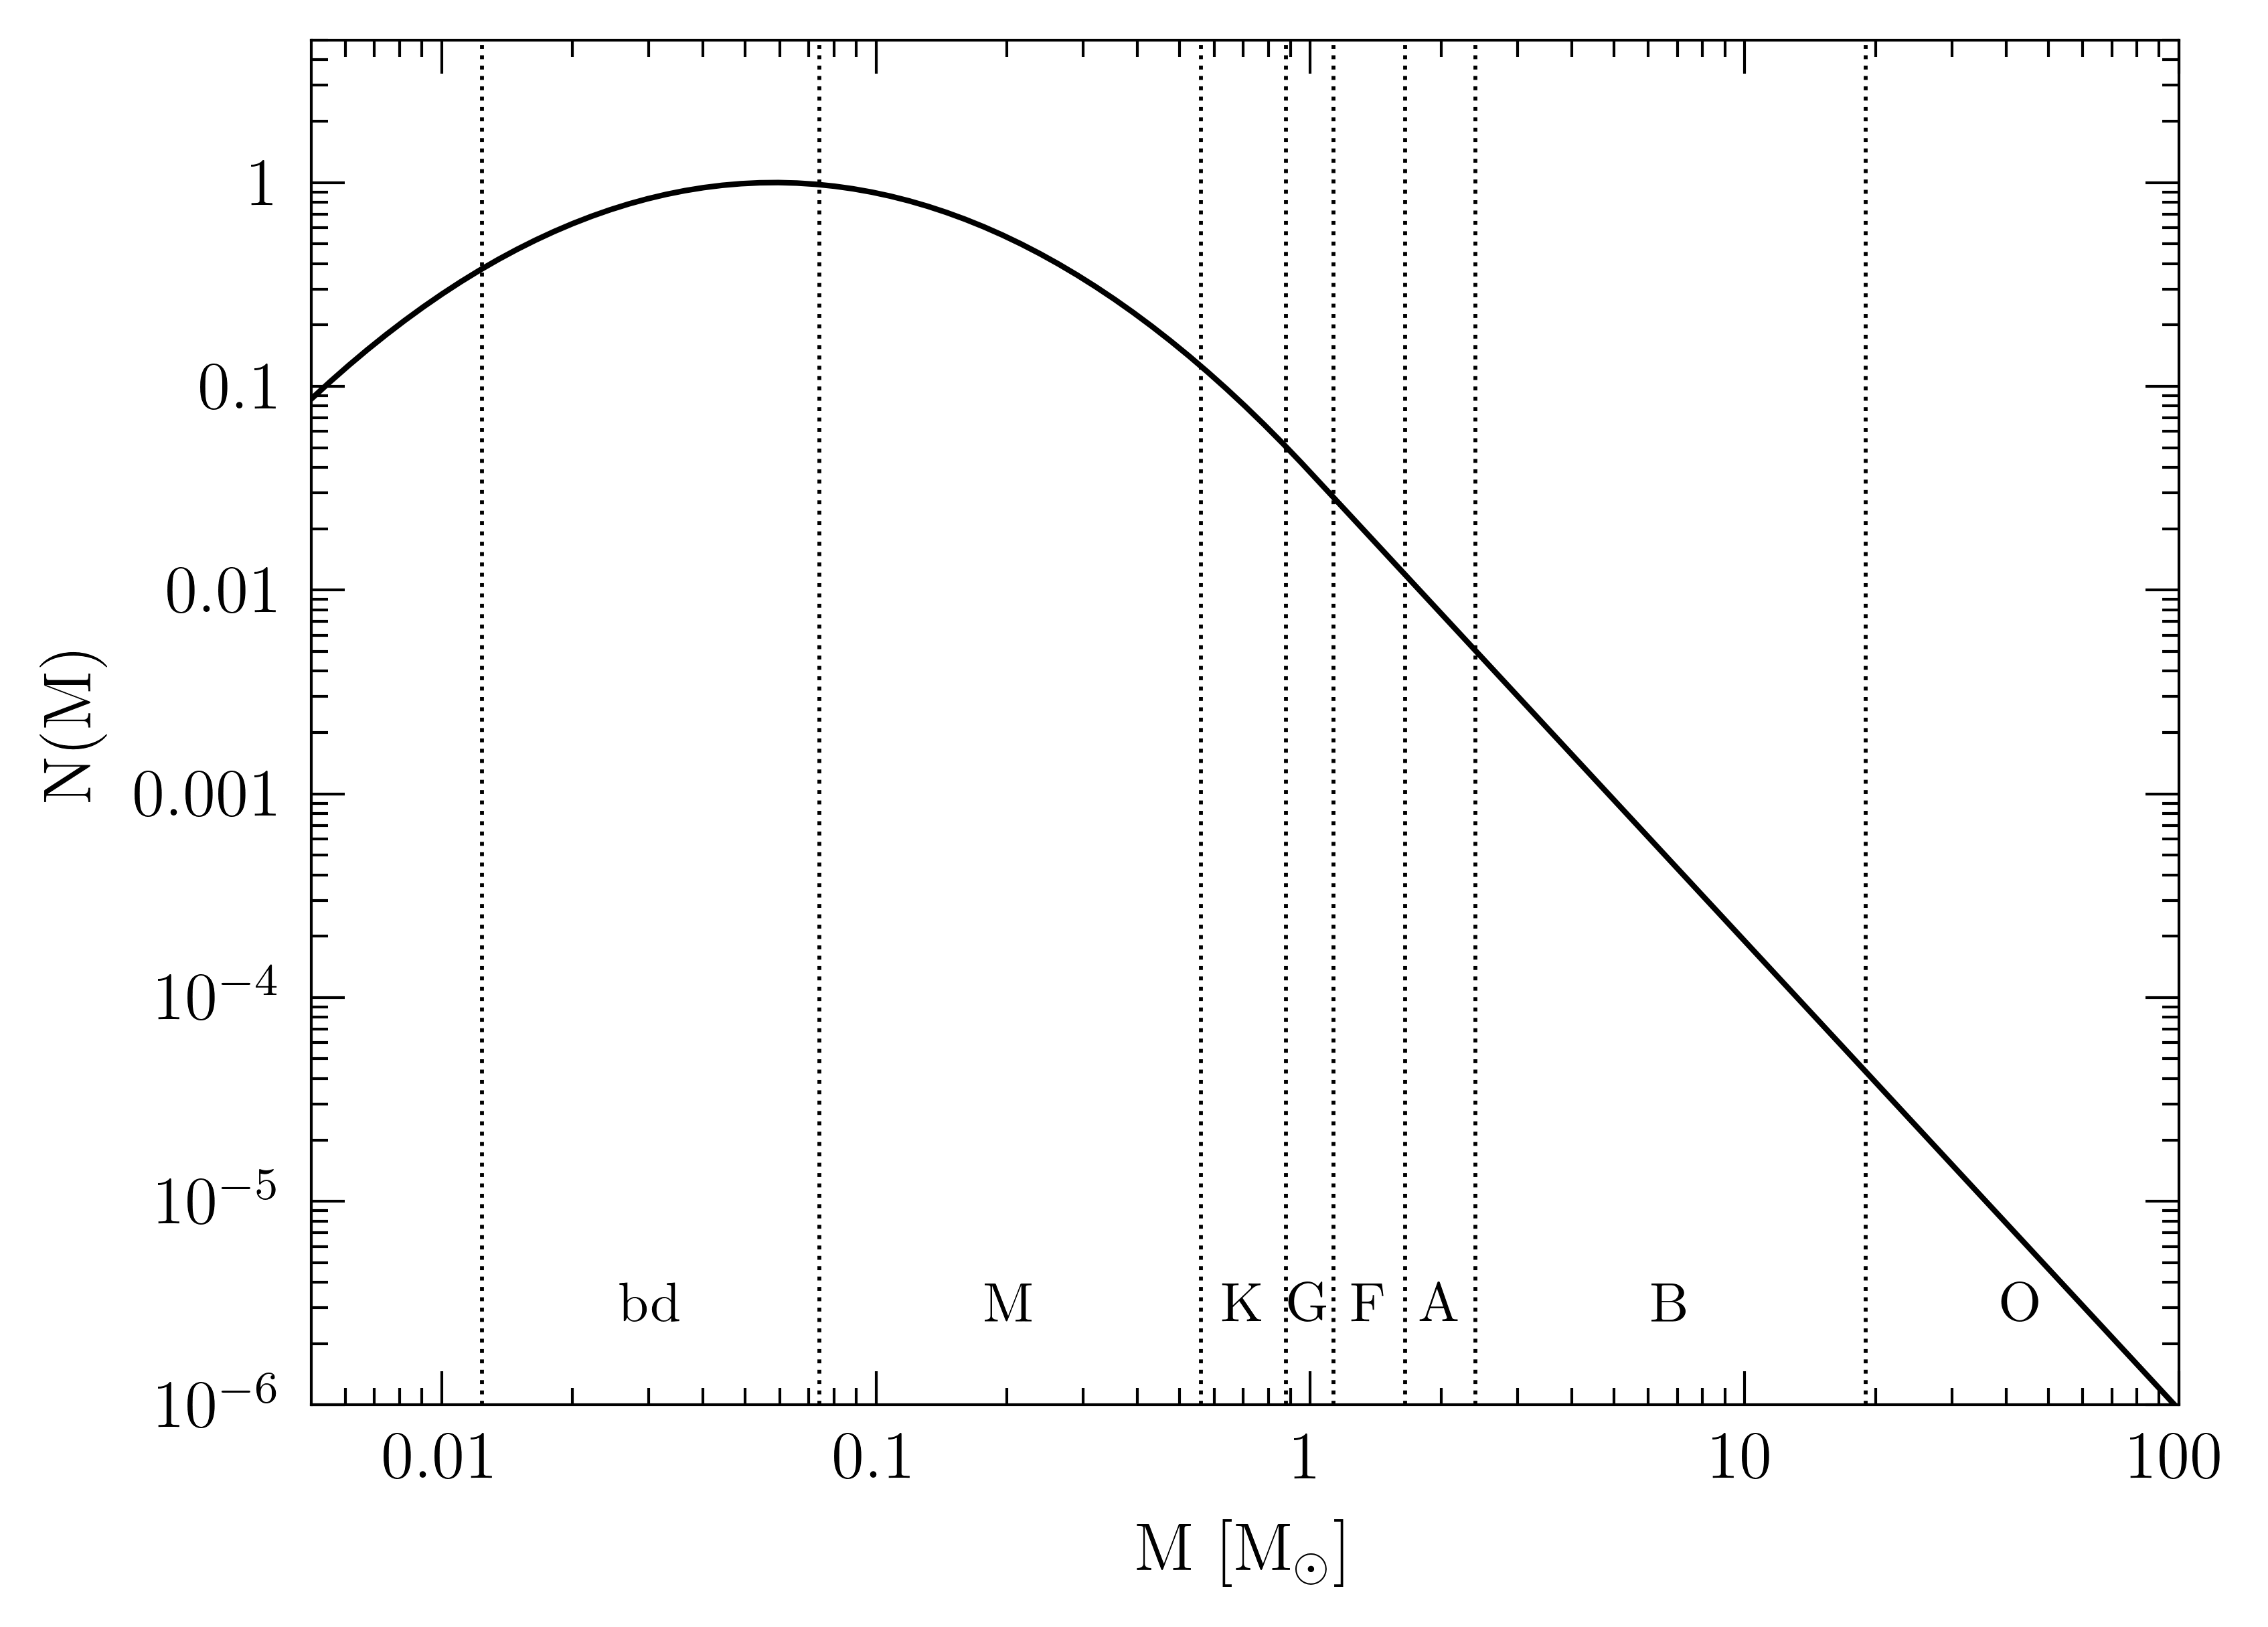

In [5]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

ax.set_xlim(mMin,mMax)
ax.set_xscale('log')
ax.xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax.xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax.xaxis.set_minor_formatter(NullFormatter())
ax.set_xticks([0.01,0.1,1,10,100])
ax.set_xticklabels(['0.01','0.1','1','10','100'])
ax.set_xlabel(r'M [M$_\odot$]',fontsize=axisFontSize)

ax.set_ylim(fMin,fMax)
ax.set_yscale('log')
ax.yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax.yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax.yaxis.set_minor_formatter(NullFormatter())
ax.set_yticks([1e-6,1e-5,1e-4,0.001,0.01,0.1,1])
ax.set_yticklabels(['$10^{-6}$','10$^{-5}$','10$^{-4}$','0.001','0.01','0.1','1'])
ax.set_ylabel(r'N(M)',fontsize=axisFontSize)

ax.plot(M,f,'-',color='black',lw=1,zorder=10)

# spectral type boundaries

for spT in spTypes:
    ax.vlines(mSpT[spT],fMin,fMax,ls=[':'],color=['black'],lw=0.7)
    ax.text(xlSpT[spT],3e-6,spT,ha='center',va='center',color='black',fontsize=10)
    
plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')